# 11054 가장 긴 바이토닉 부분 수열

### Q)
수열 S가 어떤 수 Sk를 기준으로 S1 < S2 < ... Sk-1 < Sk > Sk+1 > ... SN-1 > SN을 만족한다면, 그 수열을 바이토닉 수열이라고 한다.

예를 들어, {10, 20, 30, 25, 20}과 {10, 20, 30, 40}, {50, 40, 25, 10} 은 바이토닉 수열이지만,  {1, 2, 3, 2, 1, 2, 3, 2, 1}과 {10, 20, 30, 40, 20, 30} 은 바이토닉 수열이 아니다.

수열 A가 주어졌을 때, 그 수열의 부분 수열 중 바이토닉 수열이면서 가장 긴 수열의 길이를 구하는 프로그램을 작성하시오.

### Input)
첫째 줄에 수열 A의 크기 N이 주어지고, 둘째 줄에는 수열 A를 이루고 있는 Ai가 주어진다. (1 ≤ N ≤ 1,000, 1 ≤ Ai ≤ 1,000)

### Output)
첫째 줄에 수열 A의 부분 수열 중에서 가장 긴 바이토닉 수열의 길이를 출력한다.

### Source Code)

In [ ]:
from sys import stdin
input = stdin.readline

n = int(input())
A = list(map(int, input().split()))
dp1 = [1] * n
dp2 = [1] * n

for i in range(1, n):
    for j in range(i):
        if A[i] > A[j]:
            dp1[i] = max(dp1[i], dp1[j] + 1)
    
for i in range(n-2, -1, -1):    
    for j in range(i+1, n):
        if A[i] > A[j]:
            dp2[i] = max(dp2[i], dp2[j]+1)
            

print(max([dp1[i] + dp2[i] for i in range(n)]) - 1)

증가하는 수열의 최대 길이 구하는 문제를 생각하면 쉽게 풀 수 있다.

dp1 은 증가하는 수열의 최대길이를
dp2 는 감소하는 수열의 최대길이를 나타낸 리스트이다.
-> LIS LDS 알고리즘을 섞어 쓰면 된다.

위 코드를 그림으로 나타내면 다음과 같다.

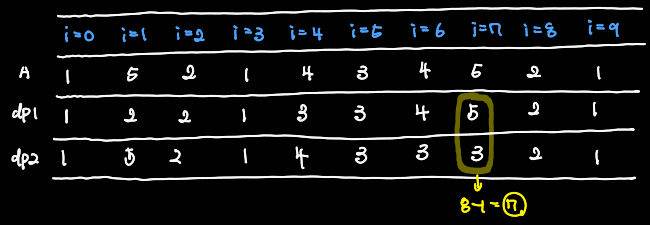

너무 시간복잡도를 줄이려하다 for문의 수를 최소화하는 방법만 고민했는데 일단 문제를 해결하는 방법을 생각하고 시간 초과가 발생하면 그 때 다시 다른 방법을 생각하자.

### LIS 이진탐색을 이용한 코드)
-> 최장 부분 수열에서 지금까지 저장해둔 수에서 어느 부분에 다음 수를 넣을지 결정함

In [ ]:
arr = list(map(int, input().split()))

LIS = [arr[0]]

def binary_search(el):
    l, r = 0, len(arr)-1

    # el이 어디에 들어갈지, index 판단
    while l <= r:
        mid = l + (r-l) // 2
        if LIS[mid] == el:
            return mid
        elif LIS[mid] < el:
            l = mid + 1
        else:
            r = mid - 1

    return l

for el in arr:
    if LIS[-1] < el: # LIS의 마지막 원소보다 크면
        LIS.append(el)

    # LIS의 마지막 원소보다 작거나 같음.
    # 적절한 index를 binary search를 이용해 찾음.
    else:
        idx = binary_search(el)
        LIS[idx] = el